In [3]:
from verify_deep_NFA import *

In [3]:
# Path to saved neural net model
path = 'C:\Repository\DSC-180A\saved_nns\celeba_num_epochs_500_learning_rate_0.1_weight_decay_0_init_default_optimizer_sgd_freeze_False_width_1024_depth_2_act_relu_nn.pth'
idxs = [0, 1]  # Layers for which to compute EGOP
init, centered, uncentered = [], [], []
for idx in idxs:
    results = verify_NFA(path, 'celeba', layer_idx=idx, feature_idx=16)
    i, c, u = results
    init.append(i.numpy().item())
    centered.append(c.numpy().item())
    uncentered.append(u.numpy().item())
for idx in idxs:
    print("Layer " + str(idx), init[idx], centered[idx], uncentered[idx])

['C:\\Repository\\DSC-180A\\saved', 'nns\\celeba', 'num', 'epochs', '500', 'learning', 'rate', '0.1', 'weight', 'decay', '0', 'init', 'default', 'optimizer', 'sgd', 'freeze', 'False', 'width', '1024', 'depth', '2', 'act', 'relu', 'nn.pth']
(1024, 27648)
(1024, 27648)
Init Net Feature Matrix Correlation:  tensor(0.1516, dtype=torch.float64)


  0%|          | 2/19962 [00:00<00:54, 363.05it/s]


Train Size:  2000 Val Size:  500 Test Size:  1
Computing Jacobian for batch:  0 2
Computing Jacobian for batch:  1 2
torch.Size([2000, 2, 27648])
0 2
1 2
Computing Jacobian for batch:  0 2
Computing Jacobian for batch:  1 2
torch.Size([2000, 2, 27648])
0 2
1 2
Full Matrix Correlation Centered:  tensor(0.9759, dtype=torch.float64)
Full Matrix Correlation Uncentered:  tensor(0.9715, dtype=torch.float64)
['C:\\Repository\\DSC-180A\\saved', 'nns\\celeba', 'num', 'epochs', '500', 'learning', 'rate', '0.1', 'weight', 'decay', '0', 'init', 'default', 'optimizer', 'sgd', 'freeze', 'False', 'width', '1024', 'depth', '2', 'act', 'relu', 'nn.pth']
(1024, 1024)
(1024, 1024)
Init Net Feature Matrix Correlation:  tensor(0.5316, dtype=torch.float64)


  0%|          | 2/19962 [00:00<01:09, 285.69it/s]


Train Size:  2000 Val Size:  500 Test Size:  1
Computing Jacobian for batch:  0 2
Computing Jacobian for batch:  1 2
torch.Size([2000, 2, 1024])
0 2
1 2
Computing Jacobian for batch:  0 2
Computing Jacobian for batch:  1 2
torch.Size([2000, 2, 1024])
0 2
1 2
Full Matrix Correlation Centered:  tensor(0.7318, dtype=torch.float64)
Full Matrix Correlation Uncentered:  tensor(0.8521, dtype=torch.float64)
Layer 0 0.15158980382745635 0.9758823208193006 0.9715194744790757
Layer 1 0.5316419521269413 0.7317654471444611 0.852082695300004


In [4]:
def plot_NFM_GOP_TopEigenVectors(path, dataset_name, feature_idx=None, layer_idx=0):
    remove_init = False
    random_net = False

    if dataset_name == 'celeba':
        NUM_CLASSES = 2
        FEATURE_IDX = feature_idx
        SIZE = 96
        c = 3
        dim = c * SIZE * SIZE
    elif dataset_name == 'svhn' or dataset_name == 'cifar':
        NUM_CLASSES = 10
        SIZE = 32
        c = 3
        dim = c * SIZE * SIZE
    elif dataset_name == 'cifar_mnist':
        NUM_CLASSES = 10
        c = 3
        SIZE = 32
        dim = c * SIZE * SIZE * 2
    elif dataset_name == 'stl_star':
        NUM_CLASSES = 2
        c = 3
        SIZE = 96
        dim = c * SIZE * SIZE

    width, depth, act_name = read_configs(path)

    net, M = load_nn(path, width, depth, dim, NUM_CLASSES, layer_idx=layer_idx,
                     remove_init=remove_init, act_name=act_name)
    subnet = build_subnetwork(net, M.shape[0], width, depth, NUM_CLASSES, layer_idx=layer_idx,
                              random_net=random_net, act_name=act_name)
    
    if dataset_name == 'celeba':
        trainloader, valloader, testloader = dataset.get_celeba(FEATURE_IDX,
                                                                num_train=20000,
                                                                num_test=1)
    elif dataset_name == 'cifar':
        trainloader, valloader, testloader = dataset.get_cifar(num_train=1000,
                                                               num_test=1)
    elif dataset_name == 'stl_star':
        trainloader, valloader, testloader = dataset.get_stl_star(num_train=1000,
                                                                  num_test=1)
    out = get_layer_output(net, trainloader, layer_idx=layer_idx)
    G = egop(subnet, out, centering=True)
    G2 = egop(subnet, out, centering=False)

    return M, G

In [6]:
path = 'C:\Repository\DSC-180A\saved_nns\celeba_num_epochs_500_learning_rate_0.1_weight_decay_0_init_default_optimizer_sgd_freeze_False_width_1024_depth_2_act_relu_nn.pth'
M, G = plot_NFM_GOP_TopEigenVectors(
        path, 'celeba', layer_idx=0, feature_idx=16)

['C:\\Repository\\DSC-180A\\saved', 'nns\\celeba', 'num', 'epochs', '500', 'learning', 'rate', '0.1', 'weight', 'decay', '0', 'init', 'default', 'optimizer', 'sgd', 'freeze', 'False', 'width', '1024', 'depth', '2', 'act', 'relu', 'nn.pth']
(1024, 27648)


  0%|          | 2/19962 [00:00<00:29, 666.82it/s]


Train Size:  2000 Val Size:  500 Test Size:  1
Computing Jacobian for batch:  0 2
Computing Jacobian for batch:  1 2
torch.Size([2000, 2, 27648])
0 2
1 2
Computing Jacobian for batch:  0 2
Computing Jacobian for batch:  1 2
torch.Size([2000, 2, 27648])
0 2
1 2


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_NFM_GOP(Mat):
    # Extract the diagonal
    diagonal = np.diag(M)

    # Split the diagonal into three parts for RGB channels
    length = len(diagonal) // 3
    diagonal_r = diagonal[:length]
    diagonal_g = diagonal[length:2*length]
    diagonal_b = diagonal[2*length:]

    # Reshape each part into a 96x96 matrix
    image_r = diagonal_r.reshape(96, 96)
    image_g = diagonal_g.reshape(96, 96)
    image_b = diagonal_b.reshape(96, 96)

    # Stack the reshaped parts to form a 96x96x3 image
    image_rgb = np.stack((image_r, image_g, image_b), axis=-1)

    # Scale the values to be in the range [0, 1] for visualization
    image_rgb_scaled = (image_rgb - np.min(image_rgb)) / (np.max(image_rgb) - np.min(image_rgb))

    # Display the image
    plt.imshow(image_rgb_scaled)
    plt.axis('off')  # Turn off axis numbers
    plt.show()

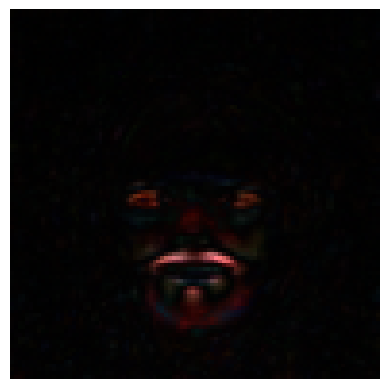

In [14]:
plot_NFM_GOP(M)

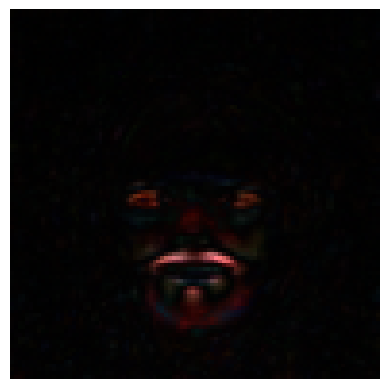

In [15]:
plot_NFM_GOP(G)